In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('FullData.csv')
df.head(7)

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89
5,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,...,12,21,19,40,13,86,88,87,85,90
6,Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,...,82,77,76,81,86,8,15,12,6,10


In [6]:
del df['National_Kit']
df.head()

,Name,Nationality,National_Position,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193 cm,...,16,14,11,47,11,91,89,95,90,89


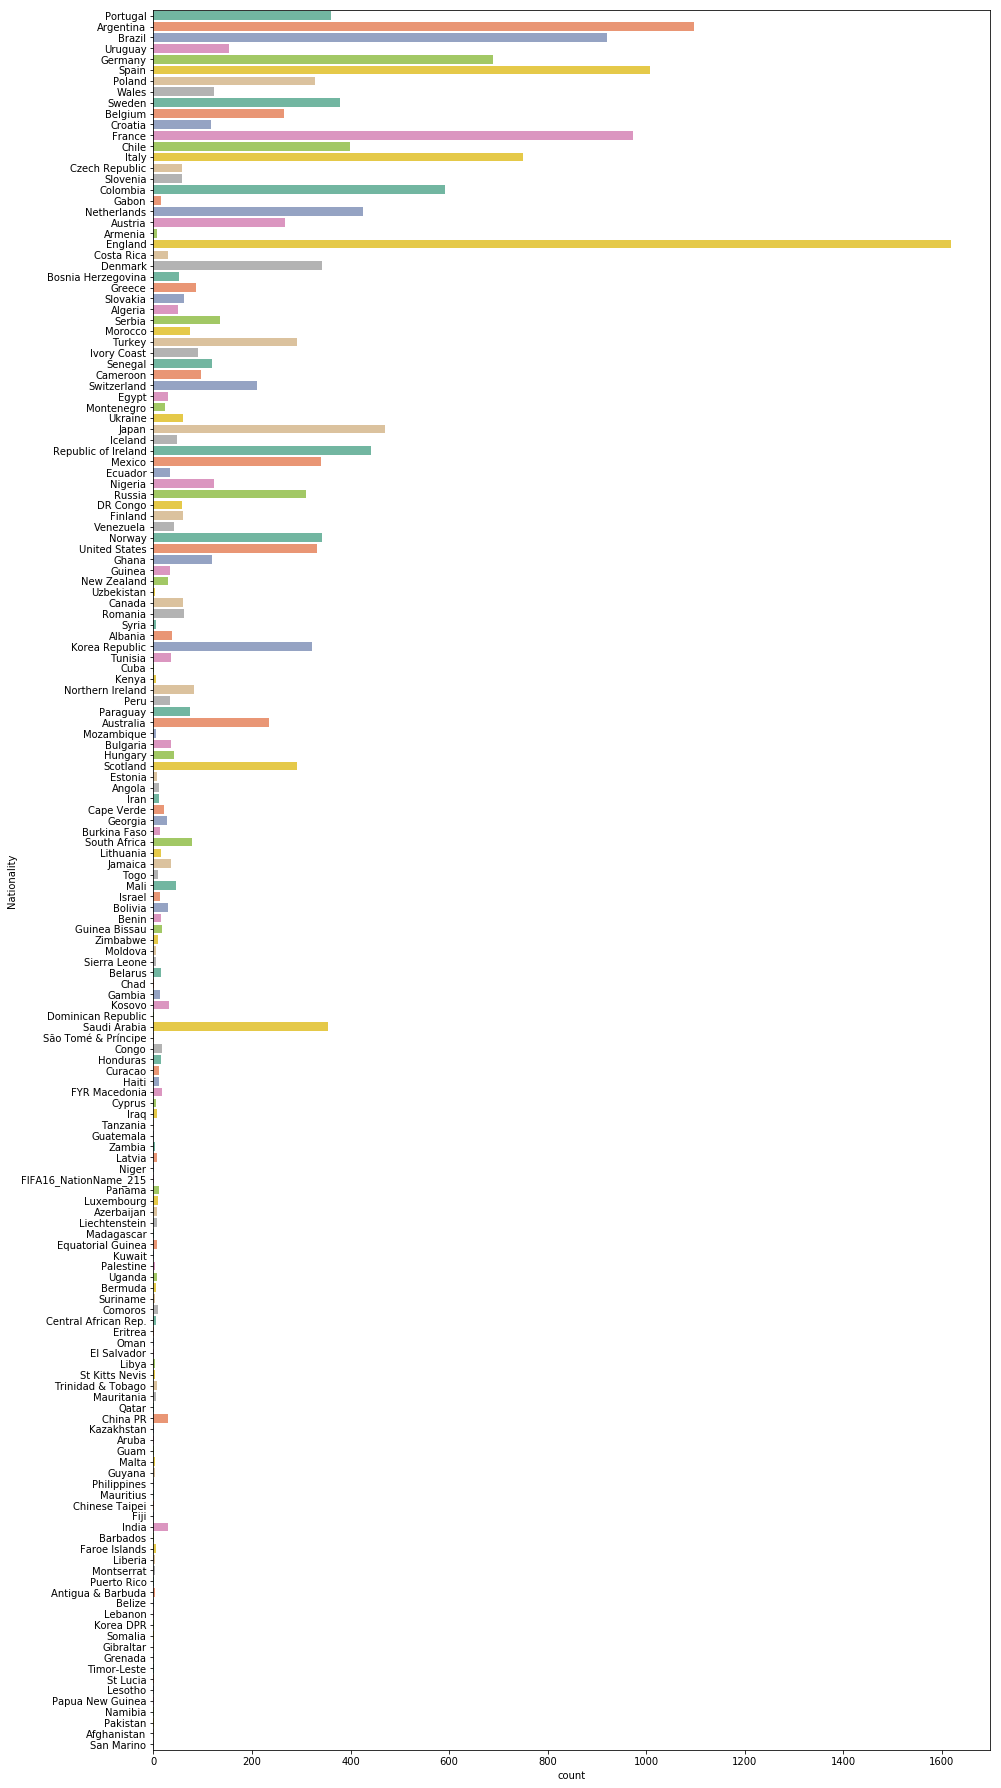

In [7]:
plt.figure(figsize=(15,32))

sns.countplot(y =  df.Nationality, palette='Set2' ) #plotting all the nations on y-axis

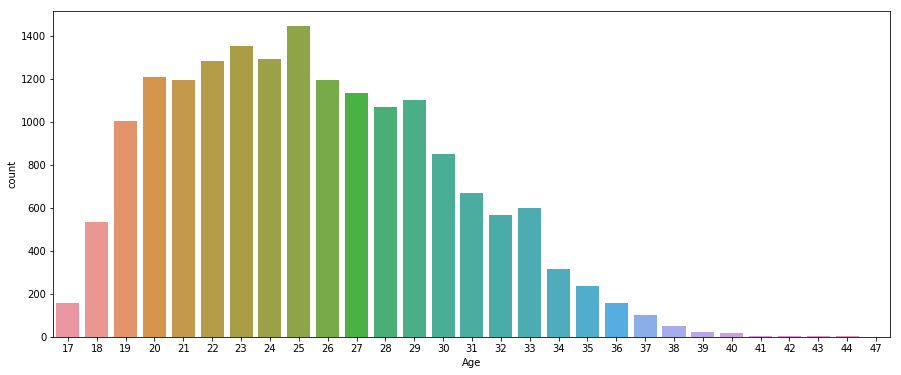

In [8]:
plt.figure(figsize =(15,6))
sns.countplot(x='Age',data=df)

In [9]:
#weights

a = 0.5
b = 1
c = 2
d = 3


In [10]:
#goal keeping Charatcteristics
df['gk_Shot_stopper'] = ( b*df.Reactions + b*df.Composure + a*df.Speed + a*df.Strength + c*df.Jumping + b*df.GK_Positioning+ c*df.GK_Diving  + d*df.GK_Reflexes + b*df.GK_Handling)/(2*a + 4*b + 2*c + 1*d)
df['gk_Sweeper'] = ( b*df.Reactions + b*df.Composure + b*df.Speed + a*df.Short_Pass + a*df.Long_Pass+ a*df.Strength + b*df.Jumping + b*df.GK_Positioning  + b*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling + d*df.GK_Kicking + c*df.Vision )/(3*a + 7*b + 1*c + 2*d)   

Text(0,0.5,'Shot Stopping Score')

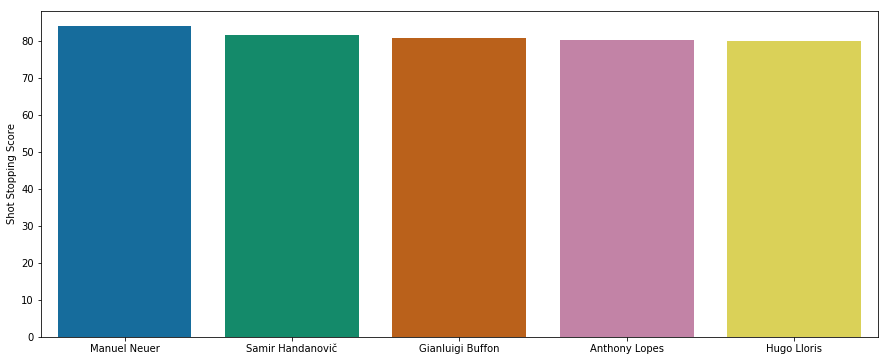

In [11]:

plt.figure(figsize = (15,6))

#Generate Sequential Data
sd1 = df.sort_values('gk_Shot_stopper', ascending = False)[:5]

x1 = np.array(list(sd1['Name']))

y1 = np.array(list(sd1['gk_Shot_stopper']))

sns.barplot(x1,y1, palette = "colorblind")
plt.ylabel("Shot Stopping Score") 


Text(0,0.5,'Sweeping Score')

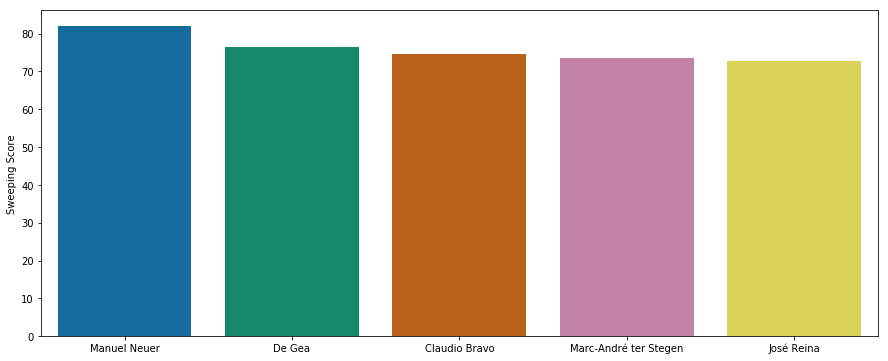

In [12]:

plt.figure(figsize = (15,6))


sd1 = df.sort_values('gk_Sweeper', ascending = False)[:5]

x1 = np.array(list(sd1['Name']))

y1= np.array(list(sd1['gk_Sweeper']))

sns.barplot(x1,y1, palette = "colorblind")
plt.ylabel("Sweeping Score") 


In [13]:
#Defenders Charatcteristics

df['gk_Center_Backs'] = ( d*df.Reactions + b*df.Composure + d*df.Sliding_Tackle + d*df.Standing_Tackle + a*df.Strength + c*df.Jumping + b*df.GK_Positioning  + c*df.GK_Diving  + d*df.GK_Reflexes + c*df.Interceptions + b*df.GK_Handling + b*df.Vision + b*df.Crossing + a*df.Short_Pass + b*df.Long_Pass + 
                         + d*df.Stamina + d*df.Jumping +d*df.Heading +d*df.Long_Shots +  d*df.Marking + b*df.Aggression + c*df.Acceleration )/(2*a + 7*b + 4*c + 9*d)

df['gk_Sweeper']      = (b*df.Ball_Control + a*df.Dribbling + d*df.Marking + d*df.Sliding_Tackle + d*df.Standing_Tackle + a*df.Attacking_Position + c*df.Vision + c*df.Crossing  + b*df.Short_Pass  + c*df.Long_Pass + d*df.Acceleration + d*df.Speed
                          + c*df.Stamina + a*df.Finishing)/(3*a + 2*b + 4*c + 4*d)  




Text(0,0.5,'LCB Score')

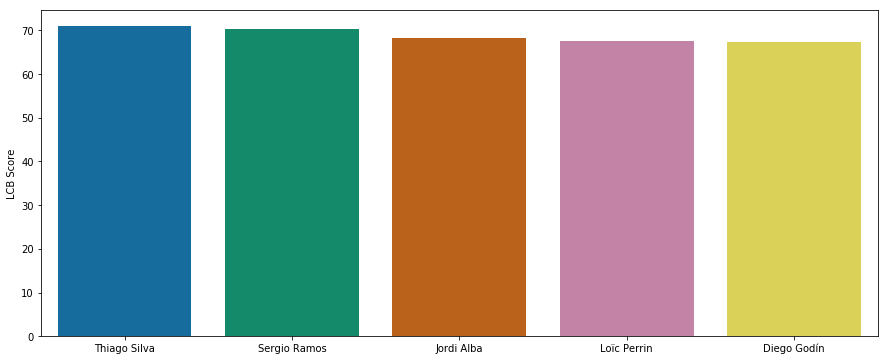

In [14]:
#Gplot left central back

plt.figure(figsize=(15,6))
sd1 = df[(df['Club_Position'] == 'LCB')].sort_values('gk_Center_Backs', ascending = False)[:5]

x2 = np.array(list(sd1['Name']))
y2 = np.array(list(sd1['gk_Center_Backs']))
sns.barplot(x2,y2, palette = "colorblind")
plt.ylabel("LCB Score") 


Text(0,0.5,'RCB Score')

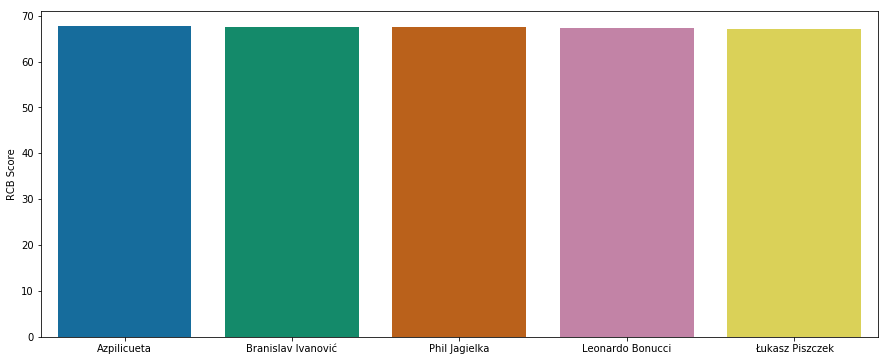

In [15]:
#Gplot Right central back

plt.figure(figsize=(15,6))
sd1 = df[(df['Club_Position'] == 'RCB')].sort_values('gk_Center_Backs', ascending = False)[:5]

x2 = np.array(list(sd1['Name']))
y2 = np.array(list(sd1['gk_Center_Backs']))
sns.barplot(x2,y2, palette = "colorblind")
plt.ylabel("RCB Score") 

Text(0,0.5,'RWB Score')

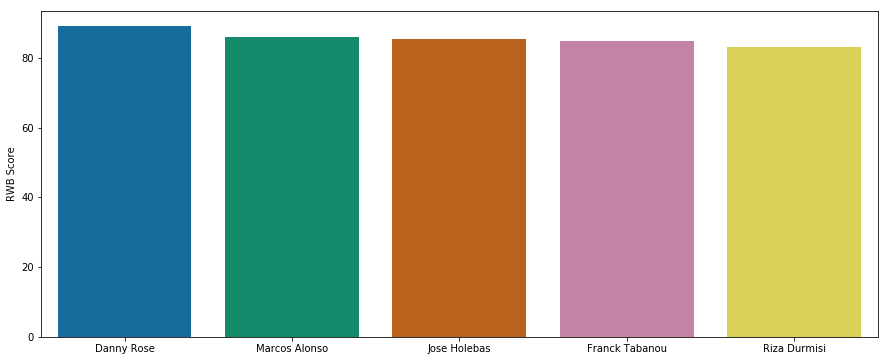

In [16]:
#Gplot left wing back

plt.figure(figsize=(15,6))
sd1 = df[(df['Club_Position'] == 'LWB')].sort_values('gk_Sweeper', ascending = False)[:5]

x2 = np.array(list(sd1['Name']))
y2 = np.array(list(sd1['gk_Sweeper']))
sns.barplot(x2,y2, palette = "colorblind")
plt.ylabel("RWB Score") 

Text(0,0.5,'RWB Score')

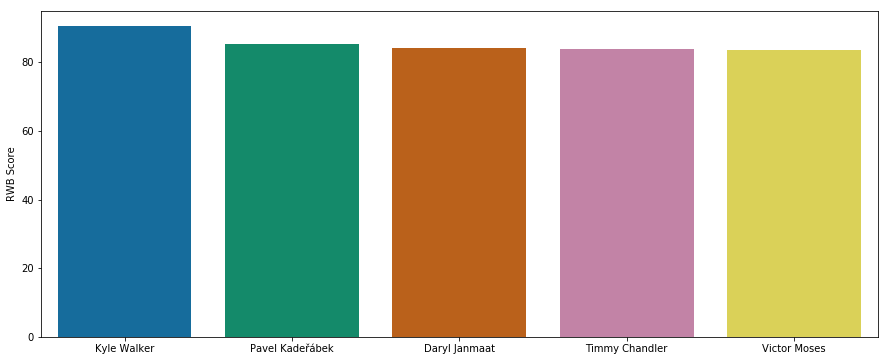

In [17]:
#Gplot Right wing back

plt.figure(figsize=(15,6))
sd1 = df[(df['Club_Position'] == 'RWB')].sort_values('gk_Sweeper', ascending = False)[:5]

x2 = np.array(list(sd1['Name']))
y2 = np.array(list(sd1['gk_Sweeper']))
sns.barplot(x2,y2, palette = "colorblind")
plt.ylabel("RWB Score") 

In [18]:
#Midfielding Indices
df['mf_playmaker'] = (d*df.Ball_Control + d*df.Dribbling + a*df.Marking + d*df.Reactions + d*df.Vision + c*df.Attacking_Position + c*df.Crossing + d*df.Short_Pass + c*df.Long_Pass + c*df.Curve + b*df.Long_Shots + c*df.Freekick_Accuracy)/(1*a + 1*b + 4*c + 4*d)
df['mf_beast'] = (d*df.Agility + c*df.Balance + b*df.Jumping + c*df.Strength + d*df.Stamina + a*df.Speed + c*df.Acceleration + d*df.Short_Pass + c*df.Aggression + d*df.Reactions + b*df.Marking + b*df.Standing_Tackle + b*df.Sliding_Tackle + b*df.Interceptions)/(1*a + 5*b + 4*c + 4*d)
df['mf_controller'] = (b*df.Weak_foot + d*df.Ball_Control + a*df.Dribbling + a*df.Marking + a*df.Reactions + c*df.Vision + c*df.Composure + d*df.Short_Pass + d*df.Long_Pass)/(2*c + 3*d + 4*a)

Text(0,0.5,'PlayMaker Score')

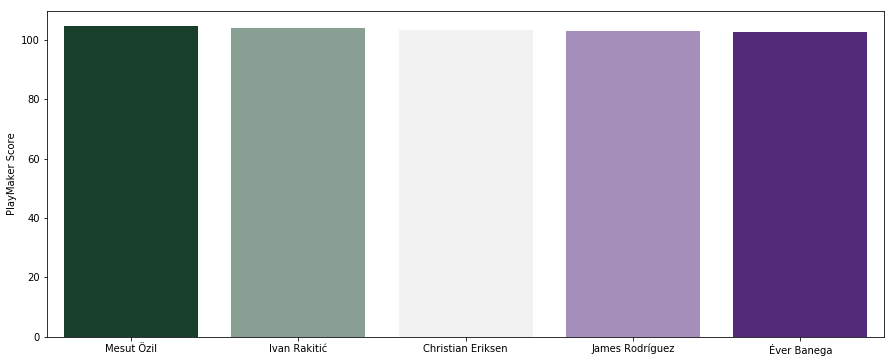

In [19]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Club_Position'] == 'CAM') | (df['Club_Position'] == 'LAM') | (df['Club_Position'] == 'RAM')].sort_values('mf_playmaker', ascending=False)[:5]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['mf_playmaker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("PlayMaker Score")

Text(0,0.5,'Beast Score')

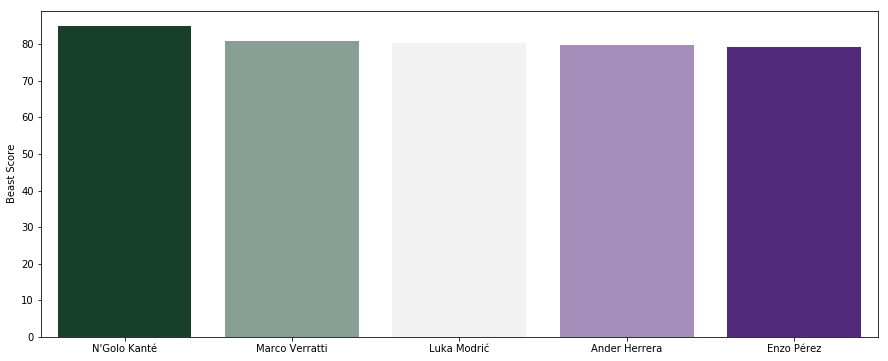

In [20]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Club_Position'] == 'RCM') | (df['Club_Position'] == 'RM')].sort_values('mf_beast', ascending=False)[:5]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['mf_beast']))
sns.barplot(x2, y2, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Beast Score")

Text(0,0.5,'Controller Score')

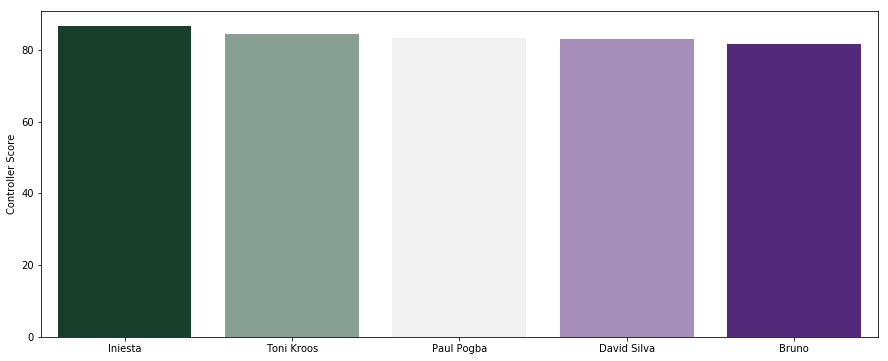

In [25]:
plt.figure(figsize=(15,6))
 
# Generate some sequential data
ss = df[(df['Club_Position'] == 'LCM') | (df['Club_Position'] == 'LM')].sort_values('mf_controller', ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['mf_controller']))
sns.barplot(x1, y1, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Controller Score")

In [26]:
#Attackers
df['att_left_wing'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['att_right_wing'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['att_striker'] = (b*df.Weak_foot + b*df.Ball_Control + a*df.Vision + b*df.Aggression + b*df.Agility + a*df.Curve + a*df.Long_Shots + d*df.Balance + d*df.Finishing + d*df.Heading + c*df.Jumping + c*df.Dribbling)/(3*a + 4*b + 2*c + 3*d)

Text(0,0.5,'Left Wing')

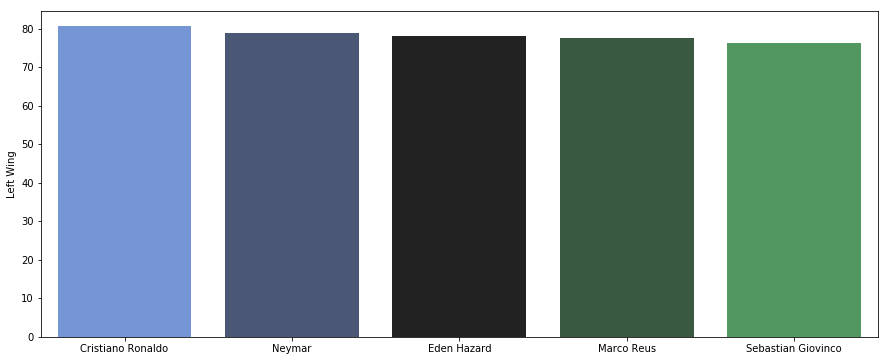

In [22]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Club_Position'] == 'LW') | (df['Club_Position'] == 'LM') | (df['Club_Position'] == 'LS')].sort_values('att_left_wing', ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['att_left_wing']))
sns.barplot(x1, y1, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Left Wing")

Text(0,0.5,'Right Wing')

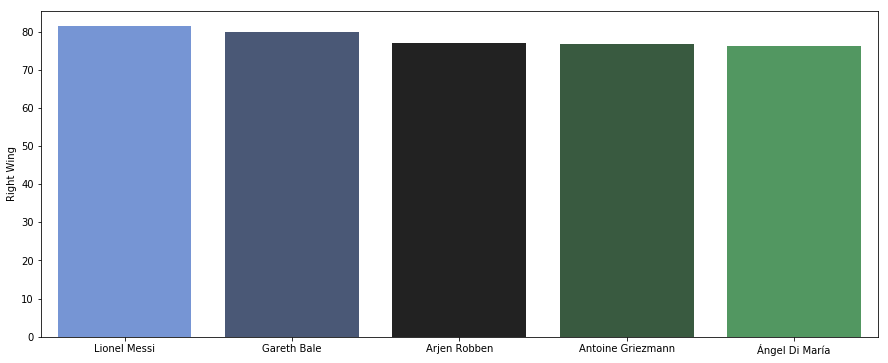

In [23]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Club_Position'] == 'RW') | (df['Club_Position'] == 'RM') | (df['Club_Position'] == 'RS')].sort_values('att_right_wing', ascending=False)[:5]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['att_right_wing']))
sns.barplot(x2, y2, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Right Wing")

Text(0,0.5,'Striker')

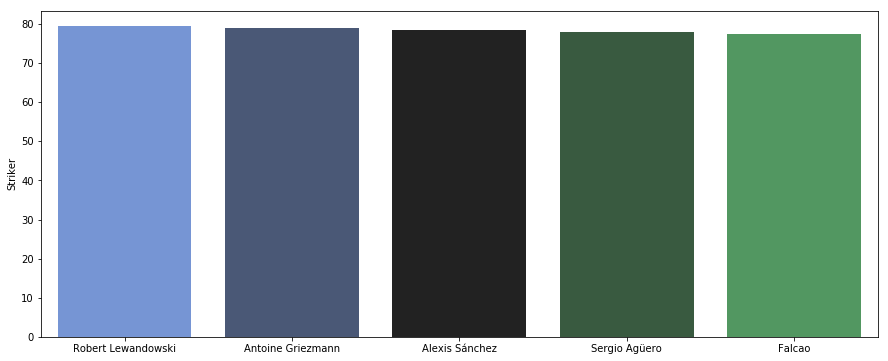

In [24]:
plt.figure(figsize=(15,6))
ss = df[(df['Club_Position'] == 'ST') | (df['Club_Position'] == 'LS') | (df['Club_Position'] == 'RS') | (df['Club_Position'] == 'CF')].sort_values('att_striker', ascending=False)[:5]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['att_striker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Striker")